## importing libraries

In [9]:
from defisheye import Defisheye
import cv2
import os
import random
import matplotlib.pyplot as plt

In [ ]:
#dataset path
DATA_PATH = "data/Fisheye8K_all_including_train&test"
TRAIN_IMAGE_DIR = os.path.join(DATA_PATH, 'train', 'images')

#selecting 5 random images
all_images = [f for f in os.listdir(TRAIN_IMAGE_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
selected_images = random.sample(all_images, 5)



Processing 1/5: camera15_A_19.png


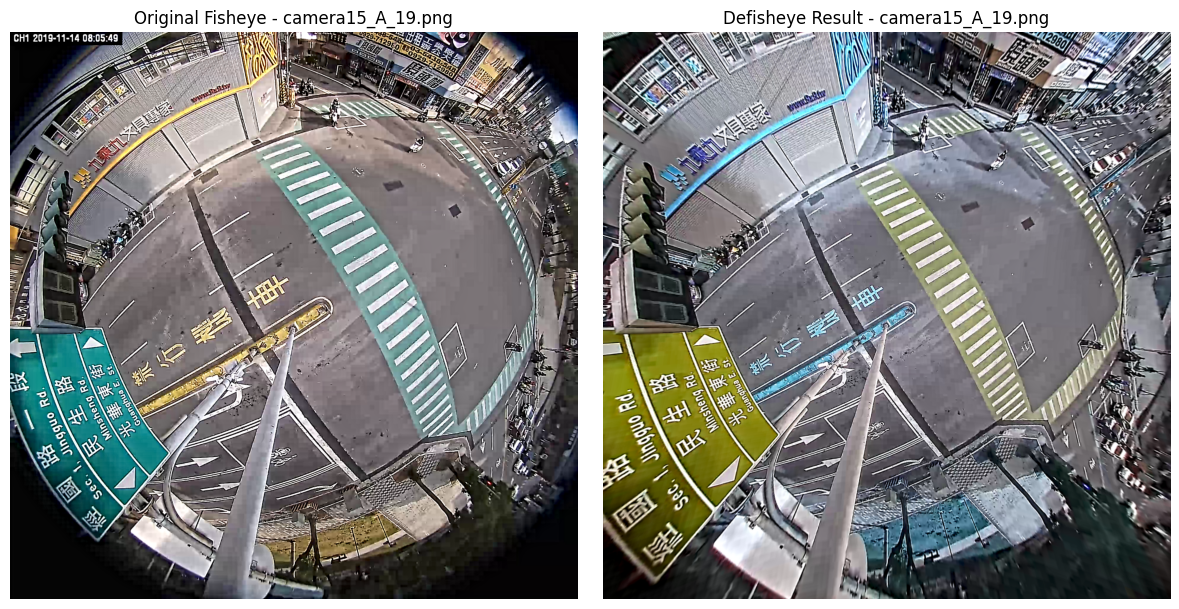

Processing 2/5: camera8_A_443.png


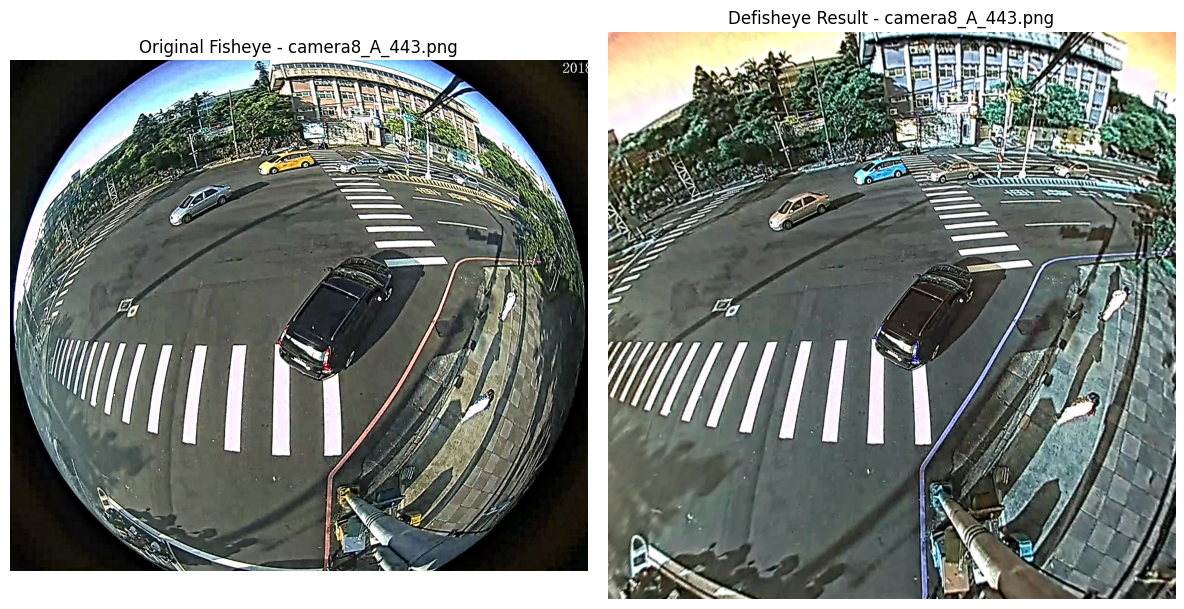

Processing 3/5: camera14_A_139.png


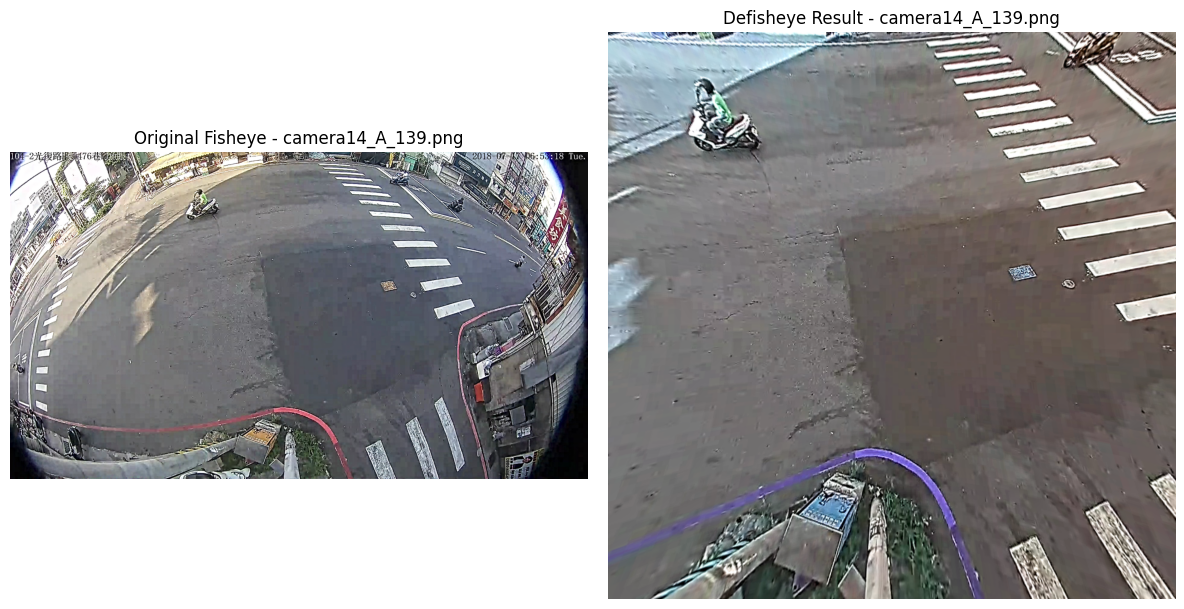

Processing 4/5: camera3_A_331.png


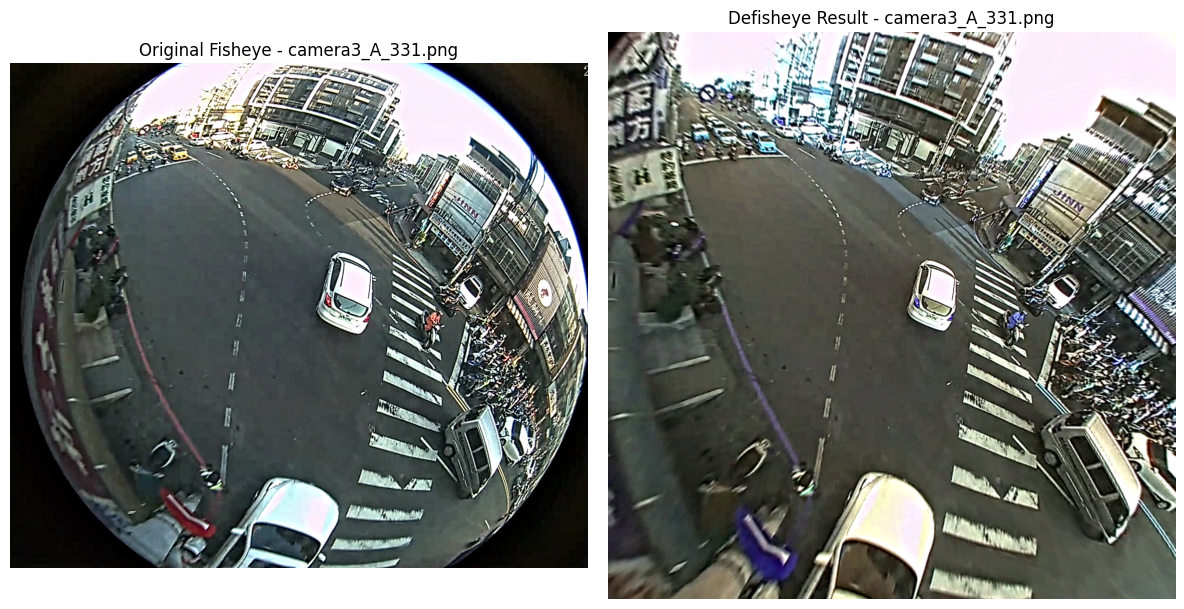

Processing 5/5: camera3_A_108.png


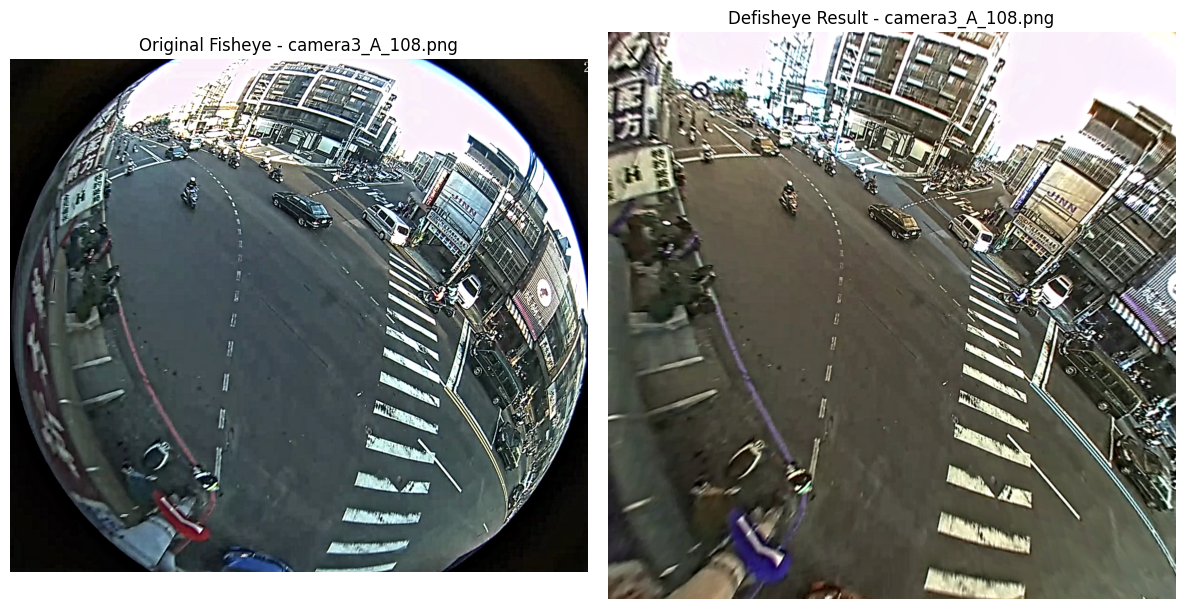

Comparison complete!


In [ ]:
#processing each image
for i, img_name in enumerate(selected_images):
    print(f"Processing {i+1}/5: {img_name}")
    
    #loading and enhancing image
    img_path = os.path.join(TRAIN_IMAGE_DIR, img_name)
    original_img = cv2.imread(img_path)
    
    if original_img is None:
        print(f"Error: Could not load image {img_path}")
        continue
    
    enhanced_img = cv2.detailEnhance(original_img, sigma_s=10, sigma_r=0.15)
    
    temp_path = f"temp_enhanced_{img_name}"
    cv2.imwrite(temp_path, enhanced_img)
    
    try:
        obj = Defisheye(temp_path, dtype='linear', format='fullframe', fov=155, pfov=122, angle=0)
        defisheye_result = obj.convert()
        
        original = plt.imread(temp_path)
        converted = defisheye_result
        
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.title(f"Original Fisheye - {img_name}")
        plt.imshow(original)
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.title(f"Defisheye Result - {img_name}")
        plt.imshow(converted)
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        os.remove(temp_path)
        
    except Exception as e:
        print(f"Error processing {img_name}: {e}")
        if os.path.exists(temp_path):
            os.remove(temp_path)
        continue

print("Comparison complete!")